In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


df = pd.read_csv("listings.csv")

df = df[df['price'].notna()]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df = df[(df['price'] > 0) & (df['price'] < 1000)]

In [ ]:
features = ['minimum_nights', 'number_of_reviews', 'availability_365']
df = df[features + ['price']].dropna()
X = df[features]
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

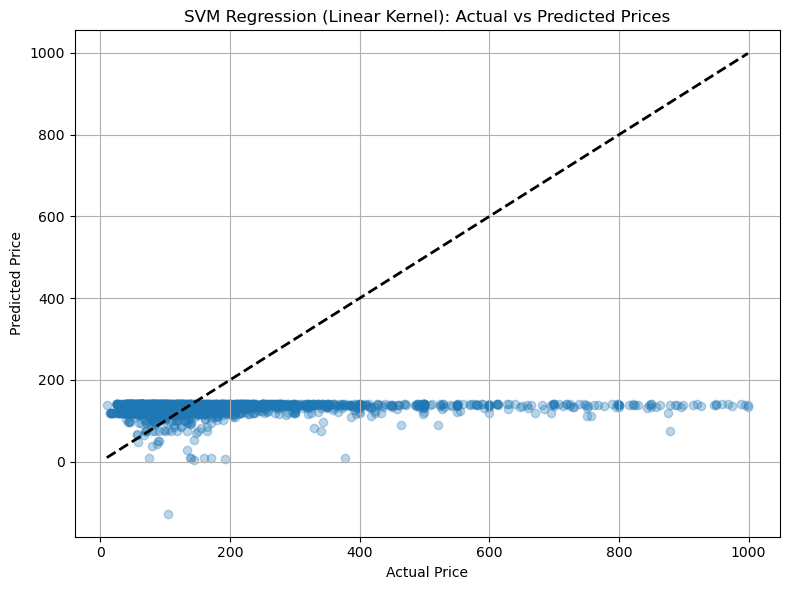

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVM Regression (Linear Kernel): Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

-So, I gave Support Vector Regression (SVR) a shot with a linear kernel. It ran fine, but the results weren't super impressive.

-The R2 was really low again — just like some earlier models — which reinforces the idea that linear models struggle to capture the Airbnb price patterns in Austin.

-Room type and availability likely interact with unmeasured stuff like location quality, which this model obviously can’t capture.

-Standardizing the data helped prevent SVM from blowing up — scaling is super important here.

-I didn’t do deep hyperparameter tuning this round, but it’s pretty clear we’re bumping into the same limits of the dataset.

-Overall, SVM gave a new angle, but didn’t outperform simpler models like polynomial regression or even PCR.

-This confirms I probably need models with more flexibility (like Random Forest or other ensemble methods) to really pick up complex signals. (TODO look in bayesian methods)